**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [7]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [12]:
# %%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self._n_neighbors = n_neighbors
        self._algorithm = algorithm

    def fit(self, X, y):
        if self._algorithm == 'brute':
            self._data = np.array(X, dtype=np.float64)
            self._labels = np.array(y, dtype=np.int64)
        elif self._algorithm == 'kd_tree':
            self._tree = KDTree(X)
            self._labels = np.array(y, dtype=np.int64)

        self._unique = np.unique(self._labels)
        self._numclasses = self._unique.size

    def brute_proba(self, x):
        dists = np.sum((self._data - x) ** 2, axis=1) ** 0.5
        labels = self._labels[np.argsort(dists)[:self._n_neighbors]]
        return np.bincount(labels, minlength=self._numclasses)

    def predict(self, X):
        if self._algorithm == 'brute':
            ans = np.zeros(len(X))
            for i, x in enumerate(X):
                ans[i] = self.brute_proba(x).argmax()
            return ans
        elif self._algorithm == 'kd_tree':
            dist, ind = self._tree.query(X, k=self._n_neighbors)
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(),
                                   1, self._labels[ind])

    def predict_proba(self, X):
        if self._algorithm == 'brute':
            ans = np.zeros((len(X), self._numclasses))
            for i, x in enumerate(X):
                ans[i] = self.brute_proba(x) / self._n_neighbors
            return ans
        elif self._algorithm == 'kd_tree':
            dist, ind = self._tree.query(X, k=self._n_neighbors)
            ans = []
            for i in ind:
                ans.append(np.bincount(self._labels[i],
                                       minlength=self._numclasses)
                           / self._n_neighbors)
            return np.array(ans)

    def score(self, X, y):
        Y = self.predict(X)
        return np.mean(y == Y)

###### **IRIS**

In [13]:
iris = datasets.load_iris()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [16]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [17]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [18]:
%time clf.predict(X_test)

Wall time: 1 ms


array([1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0])

In [19]:
%time my_clf.predict(X_test)

Wall time: 1 ms


array([1., 2., 0., 2., 2., 0., 2., 2., 1., 2., 1., 0., 0., 1., 0.])

In [20]:
%time clf.predict_proba(X_test)

Wall time: 973 µs


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [21]:
%time my_clf.predict_proba(X_test)

Wall time: 1 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [22]:
clf.score(X_test, y_test)

0.9333333333333333

In [23]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

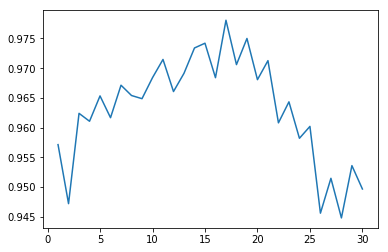

In [24]:
MAX_NEIGHBORS = 30
NUM_ITERATIONS = 1000

results = [0]
for neighbors in range(1, MAX_NEIGHBORS + 1):
    sum = 0
    for it in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        clf = MyKNeighborsClassifier(n_neighbors=neighbors)
        clf.fit(X_train, y_train)
        sum += clf.score(X_test, y_test)
    results.append(sum / NUM_ITERATIONS)
best_num = np.argmax(results)
plt.plot(range(1, MAX_NEIGHBORS + 1), results[1:])
plt.show()

**MNIST**

In [25]:
mnist = fetch_mldata('MNIST original')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [27]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [28]:
%time clf.fit(X_train, y_train)

Wall time: 27.9 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

Wall time: 169 ms


In [30]:
%time clf.predict(X_test)

Wall time: 1min 8s


array([8., 3., 4., 1., 6., 5., 9., 7., 8., 9., 7., 7., 6., 0., 4., 7., 3.,
       4., 0., 0., 1., 0., 9., 9., 4., 4., 1., 3., 7., 2., 9., 7., 8., 3.,
       3., 7., 8., 0., 1., 3., 2., 0., 7., 0., 2., 5., 5., 6., 6., 2., 3.,
       7., 1., 3., 7., 8., 2., 6., 9., 0., 8., 6., 4., 1., 2., 9., 2., 1.,
       3., 6., 5., 4., 7., 2., 2., 2., 8., 8., 6., 3., 3., 2., 4., 0., 5.,
       7., 8., 0., 0., 2., 9., 4., 7., 5., 8., 7., 4., 1., 4., 9., 6., 9.,
       4., 0., 9., 9., 4., 6., 7., 3., 4., 3., 5., 8., 9., 6., 1., 6., 3.,
       1., 8., 8., 9., 8., 3., 3., 5., 7., 0., 4., 9., 1., 6., 3., 4., 7.,
       0., 1., 9., 9., 8., 5., 3., 7., 1., 2., 8., 6., 9., 8., 6., 5., 1.,
       9., 2., 3., 0., 6., 4., 1., 2., 4., 9., 4., 7., 8., 6., 1., 2., 5.,
       0., 4., 2., 7., 9., 0., 8., 4., 7., 5., 4., 1., 5., 2., 4., 7., 7.,
       0., 1., 8., 0., 5., 3., 2., 1., 3., 6., 0., 1., 5., 6., 6., 7., 9.,
       5., 0., 4., 0., 2., 9., 2., 6., 9., 8., 2., 8., 7., 4., 9., 3., 7.,
       0., 9., 8., 1., 1.

In [31]:
%time my_clf.predict(X_test)

Wall time: 5min 53s


array([8., 3., 4., 1., 6., 5., 9., 7., 8., 9., 7., 7., 6., 0., 4., 7., 3.,
       4., 0., 0., 1., 0., 9., 9., 4., 4., 1., 3., 7., 2., 9., 7., 8., 3.,
       3., 7., 8., 0., 1., 3., 2., 0., 7., 0., 2., 5., 5., 6., 6., 2., 3.,
       7., 1., 3., 7., 8., 2., 6., 9., 0., 8., 6., 4., 1., 2., 9., 2., 1.,
       3., 6., 5., 4., 7., 2., 2., 2., 8., 8., 6., 3., 3., 2., 4., 0., 5.,
       7., 8., 0., 0., 2., 9., 4., 7., 5., 8., 7., 4., 1., 4., 9., 6., 9.,
       4., 0., 9., 9., 4., 6., 7., 3., 4., 3., 5., 8., 9., 6., 1., 6., 3.,
       1., 8., 8., 9., 8., 3., 3., 5., 7., 0., 4., 9., 1., 6., 3., 4., 7.,
       0., 1., 9., 9., 8., 5., 3., 7., 1., 2., 8., 6., 9., 8., 6., 5., 1.,
       9., 2., 3., 0., 6., 4., 1., 2., 4., 9., 4., 7., 8., 6., 1., 2., 5.,
       0., 4., 2., 7., 9., 0., 8., 4., 7., 5., 4., 1., 5., 2., 4., 7., 7.,
       0., 1., 8., 0., 5., 3., 2., 1., 3., 6., 0., 1., 5., 6., 6., 7., 9.,
       5., 0., 4., 0., 2., 9., 2., 6., 9., 8., 2., 8., 7., 4., 9., 3., 7.,
       0., 9., 8., 1., 1.

In [32]:
%time clf.predict_proba(X_test)

Wall time: 1min 8s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

Wall time: 5min 57s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9657142857142857

In [35]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 4

In [36]:
clf = KNeighborsClassifier(n_neighbors=best_num, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=best_num, algorithm='kd_tree')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [38]:
%time clf.fit(X_train, y_train)

Wall time: 28.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [39]:
%time my_clf.fit(X_train, y_train)

Wall time: 27.6 s


In [40]:
%time clf.predict(X_test)

Wall time: 1min 8s


array([4., 9., 2., 7., 6., 3., 2., 9., 6., 7., 9., 0., 1., 4., 5., 1., 9.,
       8., 7., 9., 1., 8., 3., 8., 0., 3., 3., 5., 1., 1., 9., 8., 7., 6.,
       1., 3., 5., 1., 7., 2., 4., 3., 3., 8., 7., 0., 9., 9., 0., 7., 6.,
       3., 7., 1., 1., 4., 1., 7., 6., 1., 7., 7., 4., 6., 1., 6., 7., 1.,
       2., 7., 6., 5., 0., 5., 3., 8., 7., 7., 1., 8., 0., 4., 4., 1., 9.,
       0., 7., 0., 7., 5., 2., 5., 0., 4., 4., 8., 5., 3., 8., 7., 6., 3.,
       2., 1., 0., 4., 3., 3., 6., 1., 3., 3., 1., 1., 3., 6., 0., 7., 5.,
       6., 7., 5., 5., 2., 2., 8., 2., 2., 5., 4., 6., 4., 1., 5., 7., 2.,
       9., 2., 9., 8., 1., 1., 7., 5., 9., 5., 7., 2., 3., 4., 3., 1., 5.,
       8., 4., 7., 6., 1., 9., 4., 1., 8., 1., 6., 4., 6., 8., 4., 9., 1.,
       0., 0., 9., 3., 4., 2., 3., 7., 1., 9., 2., 6., 3., 0., 4., 6., 7.,
       6., 6., 3., 6., 3., 1., 1., 7., 9., 4., 5., 1., 7., 7., 9., 6., 3.,
       3., 0., 9., 7., 3., 5., 6., 6., 5., 9., 2., 4., 3., 3., 8., 3., 8.,
       3., 8., 1., 8., 2.

In [41]:
%time my_clf.predict(X_test)

Wall time: 56.7 s


array([4, 9, 2, 7, 6, 3, 2, 9, 6, 7, 9, 0, 1, 4, 5, 1, 9, 8, 7, 9, 1, 8,
       3, 8, 0, 3, 3, 5, 1, 1, 9, 8, 7, 6, 1, 3, 5, 1, 7, 2, 4, 3, 3, 8,
       7, 0, 9, 9, 0, 7, 6, 3, 7, 1, 1, 4, 1, 7, 6, 1, 7, 7, 4, 6, 1, 6,
       7, 1, 2, 7, 6, 5, 0, 5, 3, 8, 7, 7, 1, 8, 0, 4, 4, 1, 9, 0, 7, 0,
       7, 5, 2, 5, 0, 4, 4, 8, 5, 3, 8, 7, 6, 3, 2, 1, 0, 4, 3, 3, 6, 1,
       3, 3, 1, 1, 3, 6, 0, 7, 5, 6, 7, 5, 5, 2, 2, 8, 2, 2, 5, 4, 6, 4,
       1, 5, 7, 2, 9, 2, 9, 8, 1, 1, 7, 5, 9, 5, 7, 2, 3, 4, 3, 1, 5, 8,
       4, 7, 6, 1, 9, 4, 1, 8, 1, 6, 4, 6, 8, 4, 9, 1, 0, 0, 9, 3, 4, 2,
       3, 7, 1, 9, 2, 6, 3, 0, 4, 6, 7, 6, 6, 3, 6, 3, 1, 1, 7, 9, 4, 5,
       1, 7, 7, 9, 6, 3, 3, 0, 9, 7, 3, 5, 6, 6, 5, 9, 2, 4, 3, 3, 8, 3,
       8, 3, 8, 1, 8, 2, 0, 6, 7, 0, 5, 8, 1, 0, 1, 7, 0, 7, 1, 1, 7, 0,
       6, 8, 1, 6, 7, 2, 9, 4, 9, 9, 2, 0, 4, 2, 7, 8, 7, 0, 0, 5, 0, 5,
       9, 9, 9, 1, 8, 6, 8, 3, 3, 4, 0, 6, 0, 3, 9, 0, 4, 4, 0, 1, 9, 0,
       7, 8, 5, 1, 0, 9, 0, 4, 0, 0, 6, 4, 2, 4, 5,

In [42]:
%time clf.predict_proba(X_test)

Wall time: 1min 8s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29411765],
       [0.        , 0.        , 0.        , ..., 0.        , 0.35294118,
        0.52941176],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.94117647]])

In [43]:
%time my_clf.predict_proba(X_test)

Wall time: 56.8 s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29411765],
       [0.        , 0.        , 0.        , ..., 0.        , 0.35294118,
        0.52941176],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.94117647]])

In [44]:
clf.score(X_test, y_test)

0.9714285714285714

In [45]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 5

In [46]:
# seaborn - библеотека для рисования графиков
# matplotlib - библеотека для рисования графиков
# train_test_split - функция для разбиения выборки на две части: для тренировки алгоритма 
# и для его тестирования
# %load_ext Pipeline (from sklearn.pipeline import Pipeline) - конвеер. Позволяет выполнять
# сразу некоторую последовательность действий.
# StandardScaler (from sklearn.preprocessing import StandardScaler) - стандартизует фичи, вычитая
# среднее значение и приводя дисперсию к единице
# ClassifierMixin - суперкласс для всех классификаторов в библеотеке sklearn
# NeighborsBase - интерфейс для поиска ближайших соседей
# KNeighborsMixin - суперкласс для всех методов ближайших соседей в sklearn
# SupervisedIntegerMixin - класс, содержит в себе функцию fit которая принимает целосичленные 
# значения y